In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [3]:
jokes_df = pd.read_csv('jokes1.csv')


In [4]:
len(jokes_df)

231657

In [5]:
jokes_df.head()


,ID,Joke
0,1,"[me narrating a documentary about narrators] ""..."
1,2,Telling my daughter garlic is good for you. Go...
2,3,I've been going through a really rough period ...
3,4,"If I could have dinner with anyone, dead or al..."
4,5,Two guys walk into a bar. The third guy ducks.


In [6]:

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Apply the cleaning function to the Joke column
jokes_df['Cleaned_Joke'] = jokes_df['Joke'].apply(clean_text)

# Display the cleaned text to ensure cleaning was successful
jokes_df[['Joke', 'Cleaned_Joke']]


,Joke,Cleaned_Joke
0,"[me narrating a documentary about narrators] ""...",me narrating documentary about narrators can ...
1,Telling my daughter garlic is good for you. Go...,telling my daughter garlic is good for you goo...
2,I've been going through a really rough period ...,i ve been going through really rough period at...
3,"If I could have dinner with anyone, dead or al...",if could have dinner with anyone dead or alive...
4,Two guys walk into a bar. The third guy ducks.,two guys walk into bar the third guy ducks
...,...,...
231652,The Spicy Sausage by Delia Katessen,the spicy sausage by delia katessen
231653,"TIL That I Shouldn't have gone to law school, ...",til that shouldn have gone to law school becau...
231654,What did the RAM stick say to the politician? ...,what did the ram stick say to the politician m...
231655,what do you call a play about victorian era me...,what do you call play about victorian era mens...


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the list of stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Load the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a sentence
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

# Assuming `jokes_df` is your DataFrame and it has a column 'Cleaned_Joke' with your preprocessed jokes
jokes_df['No_Stopwords_Joke'] = jokes_df['Cleaned_Joke'].apply(remove_stopwords)

# Check the first few entries to verify stopwords are removed
print(jokes_df[['Cleaned_Joke', 'No_Stopwords_Joke']].head())


[nltk_data] Downloading package punkt to /home/vvs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vvs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        Cleaned_Joke  \
0   me narrating documentary about narrators can ...   
1  telling my daughter garlic is good for you goo...   
2  i ve been going through really rough period at...   
3  if could have dinner with anyone dead or alive...   
4        two guys walk into bar the third guy ducks    

                                   No_Stopwords_Joke  
0  narrating documentary narrators hear saying cu...  
1  telling daughter garlic good good immune syste...  
2  going really rough period work week fault swap...  
3  could dinner anyone dead alive would choose al...  
4                  two guys walk bar third guy ducks  


In [8]:
jokes_df['Length'] = jokes_df['Cleaned_Joke'].apply(lambda x: len(x.split()))
jokes_df['Length']

0         14
1         19
2         23
3         14
4          9
          ..
231652     6
231653    17
231654    11
231655    11
231656    19
Name: Length, Length: 231657, dtype: int64

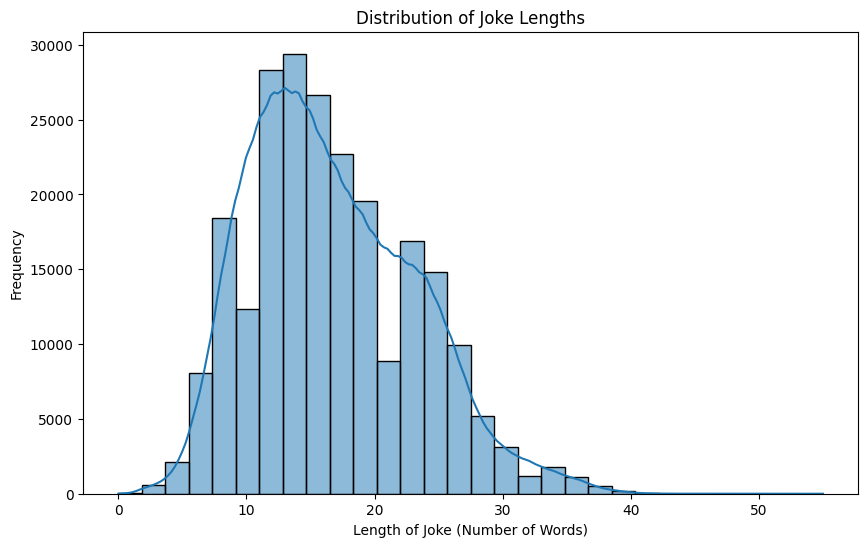

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(jokes_df['Length'], bins=30, kde=True)
plt.title('Distribution of Joke Lengths')
plt.xlabel('Length of Joke (Number of Words)')
plt.ylabel('Frequency')
plt.show()

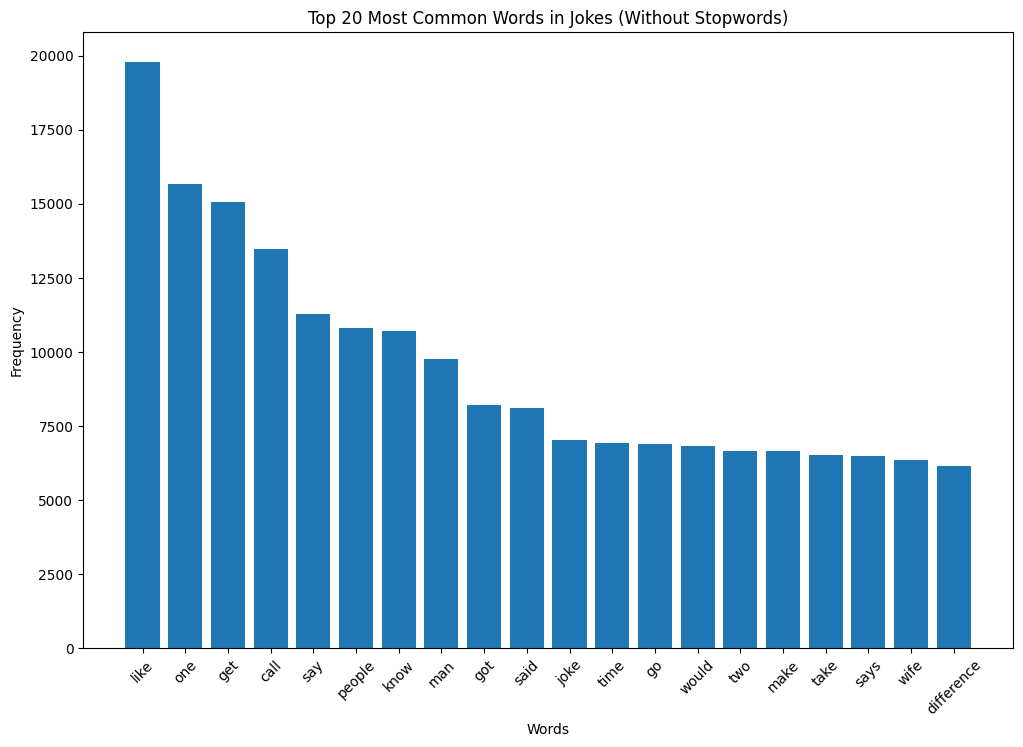

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'No_Stopwords_Joke' contains the jokes with stopwords removed
all_words = ' '.join(jokes_df['No_Stopwords_Joke']).split()
word_counts = Counter(all_words)

# Select the 20 most common words to plot
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting the word frequency distribution
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies)
plt.title('Top 20 Most Common Words in Jokes (Without Stopwords)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


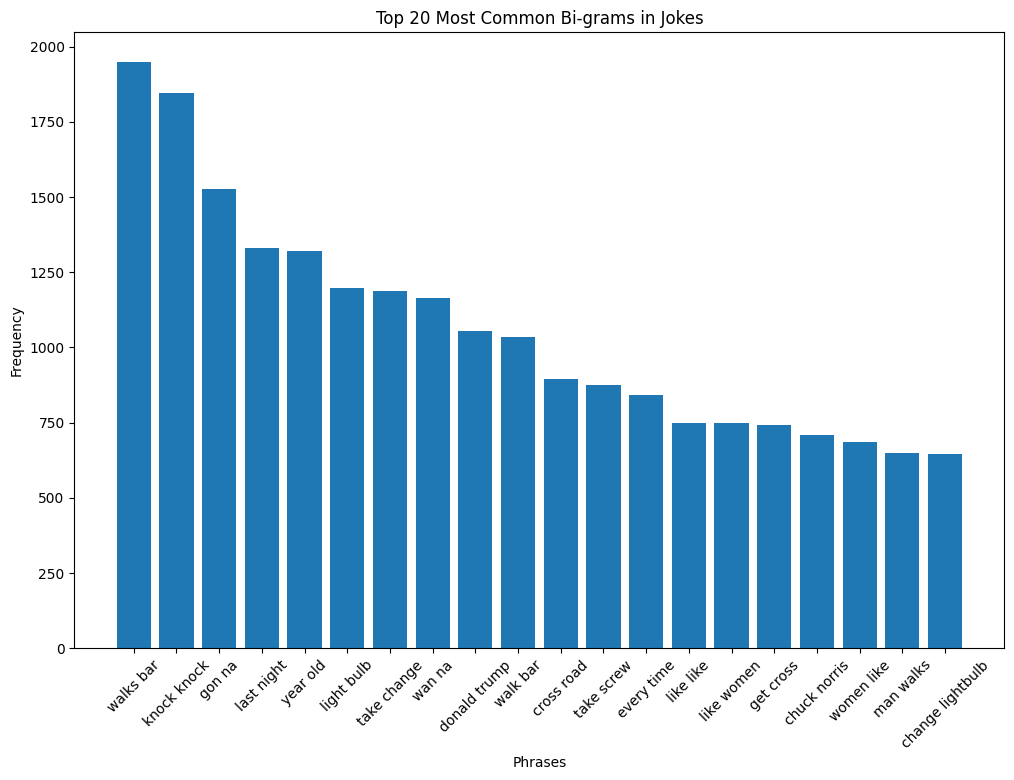

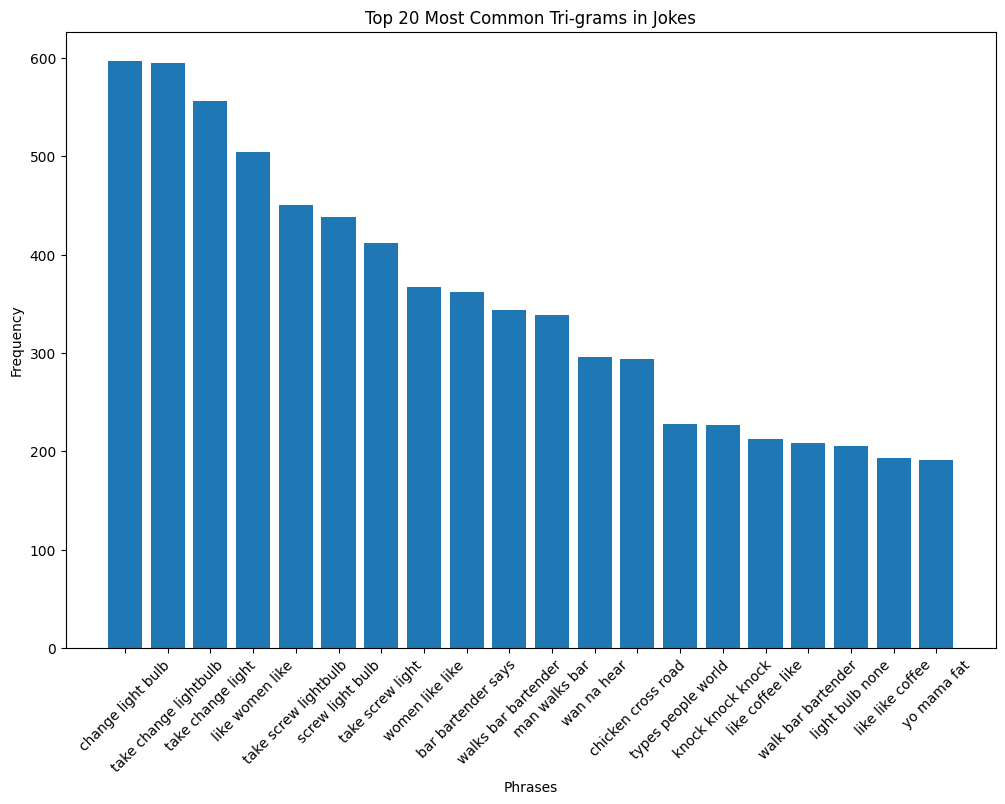

In [11]:
from nltk import bigrams, trigrams
from collections import Counter

# Generate bi-grams for all jokes
bi_grams_list = list(bigrams(all_words))
bi_gram_counts = Counter(bi_grams_list)

# Generate tri-grams for all jokes
tri_grams_list = list(trigrams(all_words))
tri_gram_counts = Counter(tri_grams_list)

# Get the 20 most common bi-grams and tri-grams
most_common_bi_grams = bi_gram_counts.most_common(20)
most_common_tri_grams = tri_gram_counts.most_common(20)

# Function to plot the n-grams
def plot_n_grams(n_grams, title):
    phrases, frequencies = zip(*n_grams)
    phrases = [' '.join(phrase) for phrase in phrases]
    
    plt.figure(figsize=(12, 8))
    plt.bar(phrases, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Phrases')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the most common bi-grams
plot_n_grams(most_common_bi_grams, 'Top 20 Most Common Bi-grams in Jokes')

# Plotting the most common tri-grams
plot_n_grams(most_common_tri_grams, 'Top 20 Most Common Tri-grams in Jokes')


In [12]:
word_freq = Counter(" ".join(jokes_df["Cleaned_Joke"]).split()).most_common(20)
word_freq

[('the', 154044),
 ('you', 89012),
 ('to', 88161),
 ('and', 59899),
 ('what', 56813),
 ('it', 55499),
 ('in', 52081),
 ('of', 49385),
 ('my', 48922),
 ('is', 43191),
 ('do', 36277),
 ('me', 32270),
 ('i', 30048),
 ('that', 29563),
 ('on', 28271),
 ('was', 27098),
 ('he', 26543),
 ('for', 26307),
 ('with', 24231),
 ('they', 23763)]

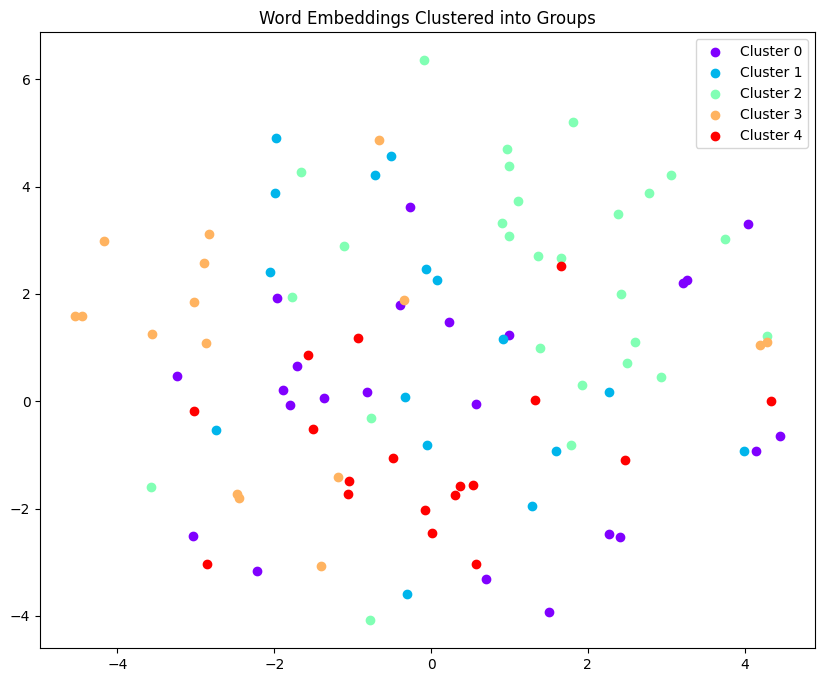

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Load or generate your word embeddings
# For this example, let's create a dummy set of 100 points (words) with 50 dimensions (embeddings)
np.random.seed(42)  # For reproducibility
word_embeddings = np.random.rand(100, 50)

# Step 2: Cluster the embeddings with K-means
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(word_embeddings)

# Step 3: Reduce dimensionality for visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)

# Step 4: Plot the clustered embeddings
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))
for i in range(num_clusters):
    plt.scatter(word_embeddings_2d[clusters == i, 0], word_embeddings_2d[clusters == i, 1], color=colors[i], label=f'Cluster {i}')
plt.title('Word Embeddings Clustered into Groups')
plt.legend()
plt.show()


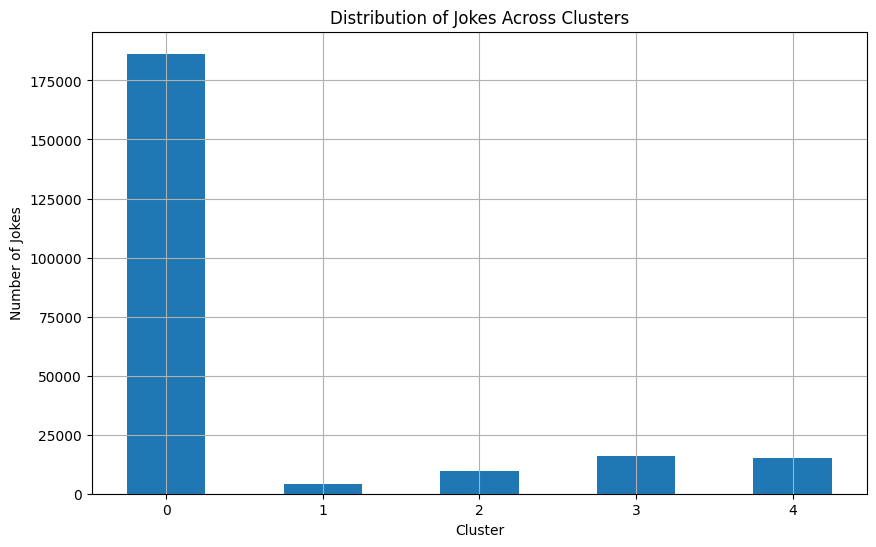

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize jokes
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(jokes_df['Joke'])

# Cluster jokes
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
jokes_df['cluster'] = clusters

# Plot histogram of joke clusters
plt.figure(figsize=(10, 6))
jokes_df['cluster'].hist(bins=range(6), align='left', rwidth=0.5)
plt.title('Distribution of Jokes Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Jokes')
plt.xticks(range(5))
plt.show()


In [15]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Assuming nltk's punkt tokenizer is already downloaded
# nltk.download('punkt')

def find_context(jokes, target_words):
    before_words = Counter()
    after_words = Counter()
    
    for joke in jokes:
        tokens = word_tokenize(joke)
        for i, token in enumerate(tokens):
            if token.lower() in target_words:
                if i > 0:
                    before_words[tokens[i-1].lower()] += 1
                if i < len(tokens) - 1:
                    after_words[tokens[i+1].lower()] += 1
    return before_words, after_words

target_words = ['humor', 'joke']  # Add any other words you're interested in
before_words, after_words = find_context(jokes_df['Cleaned_Joke'], target_words)


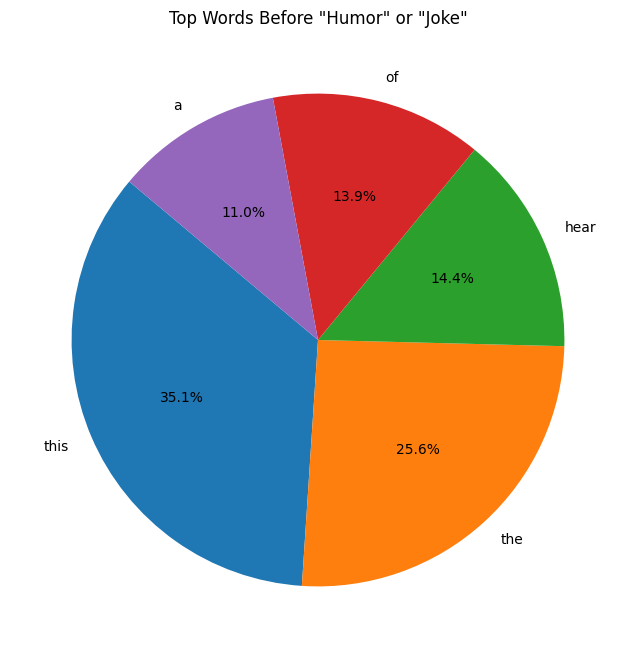

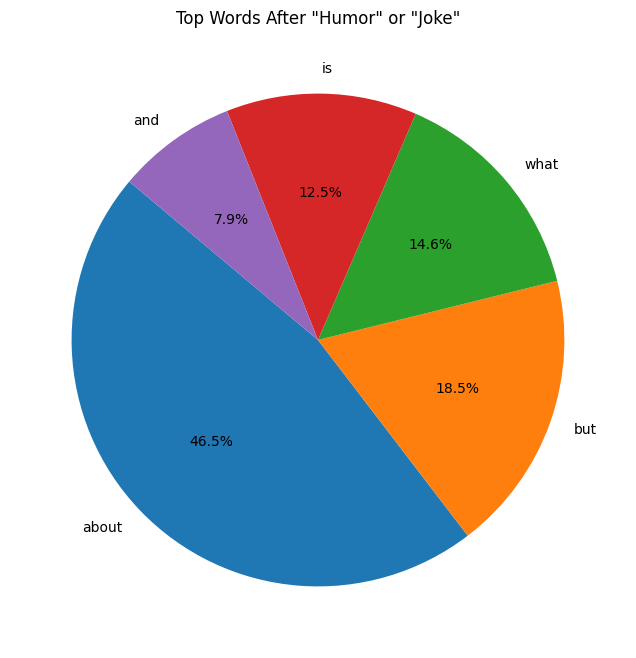

In [16]:
def plot_pie_chart(word_counts, title, n=5):
    most_common_words = word_counts.most_common(n)
    words, frequencies = zip(*most_common_words)
    
    plt.figure(figsize=(8, 8))
    plt.pie(frequencies, labels=words, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Plot pie charts for the top words before and after your target words
plot_pie_chart(before_words, 'Top Words Before "Humor" or "Joke"')
plot_pie_chart(after_words, 'Top Words After "Humor" or "Joke"')
